In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [213]:
coff_sales = pd.read_csv(r'C:\Users\Sommy\Documents\Data Analytics\Coffes Sales\Coffee Sales\index.csv')

In [11]:
coff_sales.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [12]:
coff_sales.describe()

,money
count,1653.000000
mean,31.581174
std,5.380129
min,18.120000
25%,27.920000
50%,32.820000
75%,37.720000
max,40.000000


In [13]:
coff_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1653 non-null   object 
 1   datetime     1653 non-null   object 
 2   cash_type    1653 non-null   object 
 3   card         1564 non-null   object 
 4   money        1653 non-null   float64
 5   coffee_name  1653 non-null   object 
dtypes: float64(1), object(5)
memory usage: 77.6+ KB


In [18]:
coff_sales.isnull().sum()


date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [19]:
null_card_rows = coff_sales[coff_sales['card'].isnull()]

In [21]:
print(null_card_rows)

           date                 datetime cash_type card  money  \
12   2024-03-02  2024-03-02 10:30:35.668      cash  NaN   40.0   
18   2024-03-03  2024-03-03 10:10:43.981      cash  NaN   40.0   
41   2024-03-06  2024-03-06 12:30:27.089      cash  NaN   35.0   
46   2024-03-07  2024-03-07 10:08:58.945      cash  NaN   40.0   
49   2024-03-07  2024-03-07 11:25:43.977      cash  NaN   40.0   
..          ...                      ...       ...  ...    ...   
657  2024-05-31  2024-05-31 09:23:58.791      cash  NaN   39.0   
677  2024-06-01  2024-06-01 20:54:59.267      cash  NaN   39.0   
685  2024-06-02  2024-06-02 22:43:10.636      cash  NaN   34.0   
691  2024-06-03  2024-06-03 21:42:51.734      cash  NaN   34.0   
692  2024-06-03  2024-06-03 21:43:37.471      cash  NaN   34.0   

             coffee_name  
12                 Latte  
18                 Latte  
41   Americano with Milk  
46                 Latte  
49                 Latte  
..                   ...  
657               

In [22]:
null_card_rows.head()

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte


In [ ]:
#Bar chart showing the count of people buying the different types of coffee 

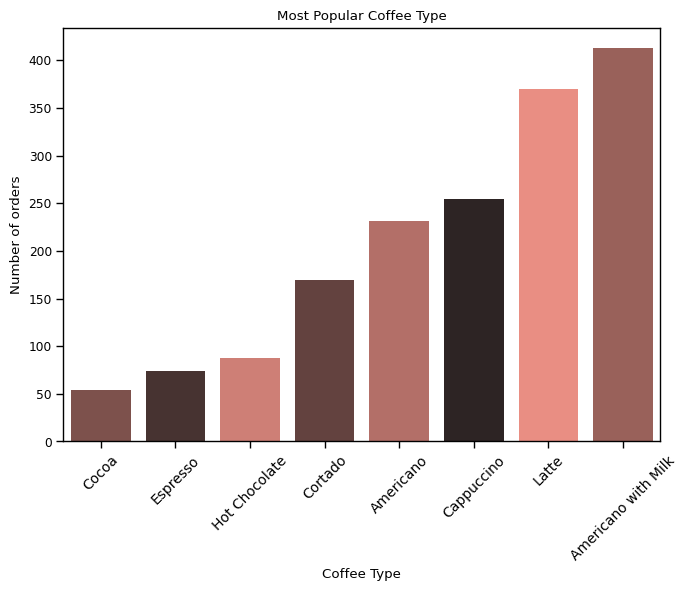

In [288]:
coffee_order = coff_sales['coffee_name'].value_counts(ascending=True).index
color = sns.color_palette("dark:salmon_r", n_colors=8, as_cmap=False)
plt.figure(figsize=(7, 6))
sns.countplot(x='coffee_name', data=coff_sales, hue='coffee_name', palette=color, order=coffee_order)
plt.xticks(rotation=45, fontsize=10) 
plt.xlabel('Coffee Type')
plt.ylabel('Number of orders')
plt.title('Most Popular Coffee Type')
plt.tight_layout()
plt.show()

In [28]:
#Analysis of avg price of coffee by the coffee

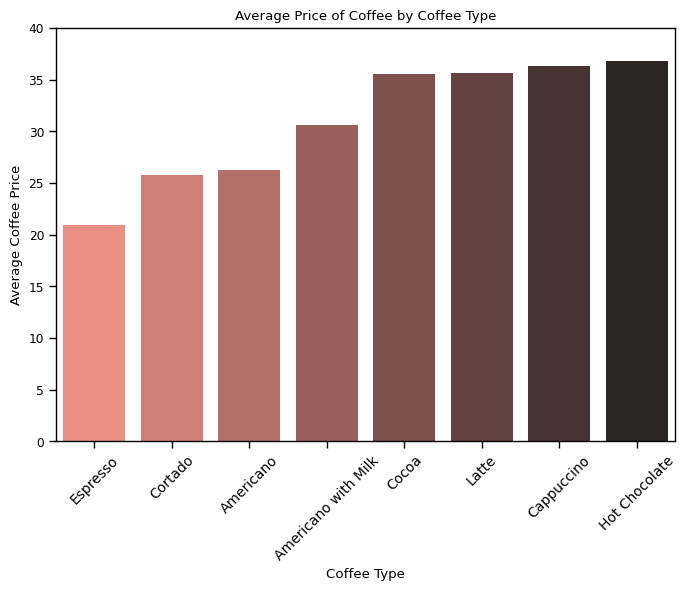

In [173]:
avg_money = coff_sales.groupby('coffee_name')['money'].mean().reset_index()
avg_money = avg_money.sort_values(by='money', ascending=True)
color = sns.color_palette("dark:salmon_r", n_colors=8, as_cmap=False)
plt.figure(figsize=(7, 6))
sns.barplot(x='coffee_name', y='money', data=avg_money, hue = 'coffee_name', palette = color, errorbar=None)
plt.xticks(rotation=45, fontsize=10) 
plt.xlabel('Coffee Type')
plt.ylabel('Average Coffee Price')
plt.title('Average Price of Coffee by Coffee Type')
plt.ylim(0, 40)
plt.tight_layout()
plt.show()

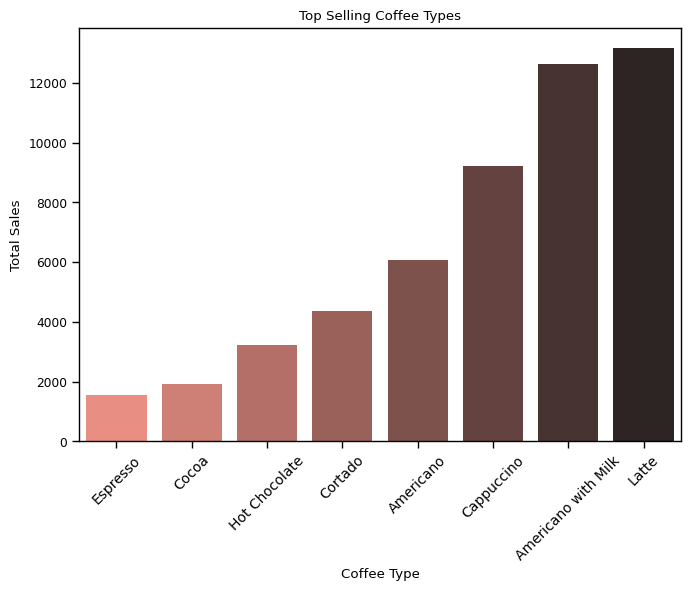

In [289]:

total_sales = coff_sales.groupby('coffee_name')['money'].sum().reset_index()
total_sales = total_sales.sort_values(by='money', ascending=True)
color = sns.color_palette("dark:salmon_r", n_colors=8, as_cmap=False)
plt.figure(figsize=(7, 6))
sns.barplot(x='coffee_name', y='money', data=total_sales,  hue = 'coffee_name', palette = color, errorbar=None)
plt.xticks(rotation=45, fontsize=10) 
plt.xlabel('Coffee Type')
plt.ylabel('Total Sales')
plt.title('Top Selling Coffee Types')
plt.tight_layout()
plt.show()


In [103]:
#Payment Preference

<function matplotlib.pyplot.show(close=None, block=None)>

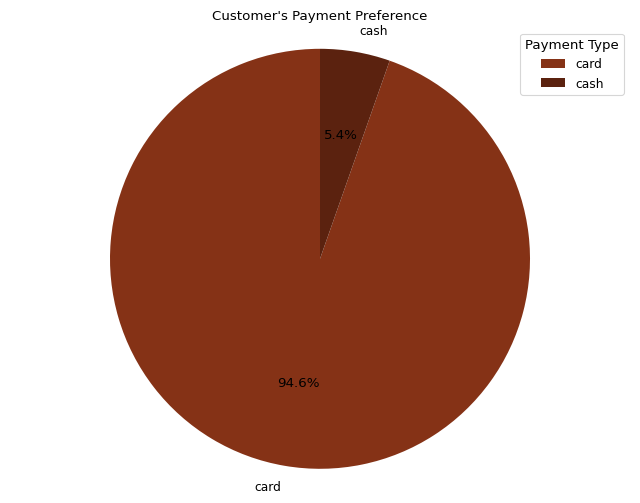

In [261]:
pay_pref = coff_sales['cash_type'].value_counts().reset_index()
plt.figure(figsize=(8, 6))  
brown_palette = ['#853216', '#5b220f'] 
plt.pie(pay_pref['count'], labels = pay_pref['cash_type'], autopct = '%.1f%%',startangle=90, 
        colors=brown_palette )
plt.legend(title="Payment Type")
plt.title('Customer\'s Payment Preference')
plt.axis('equal')
plt.show

In [106]:
#Total Sales by Month

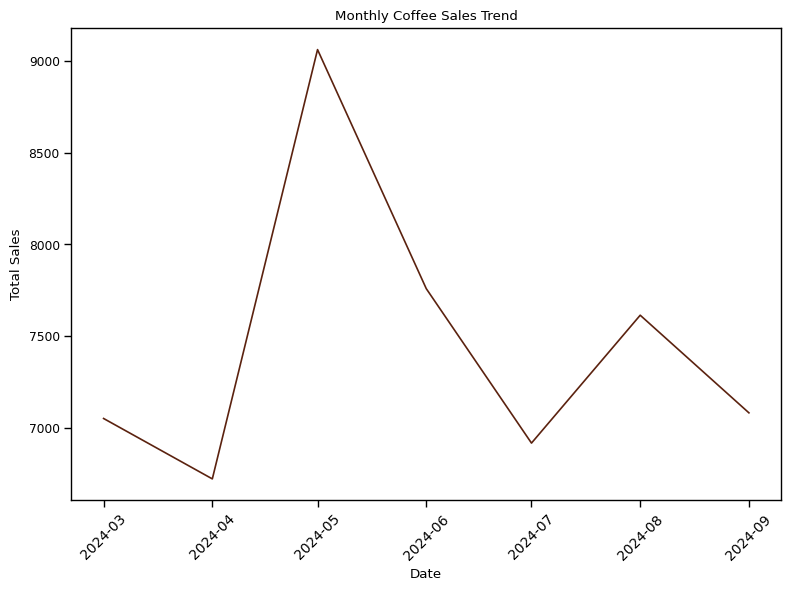

In [285]:
coff_sales['date'] = pd.to_datetime(coff_sales['date'])
coff_sales['month'] = coff_sales['date'].dt.to_period('M')
total_sales_by_month = coff_sales.groupby('month')['money'].sum().reset_index()
total_sales_by_month['month'] = total_sales_by_month['month'].dt.to_timestamp()
brown_palette = '#5b220f' 
plt.figure(figsize=(8, 6))  
sns.lineplot(x='month', y='money', data = total_sales_by_month, color=brown_palette)
plt.xticks(rotation=45, fontsize=10) 
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Coffee Sales Trend')
plt.tight_layout()
plt.show()


In [ ]:
#Peak Hours 

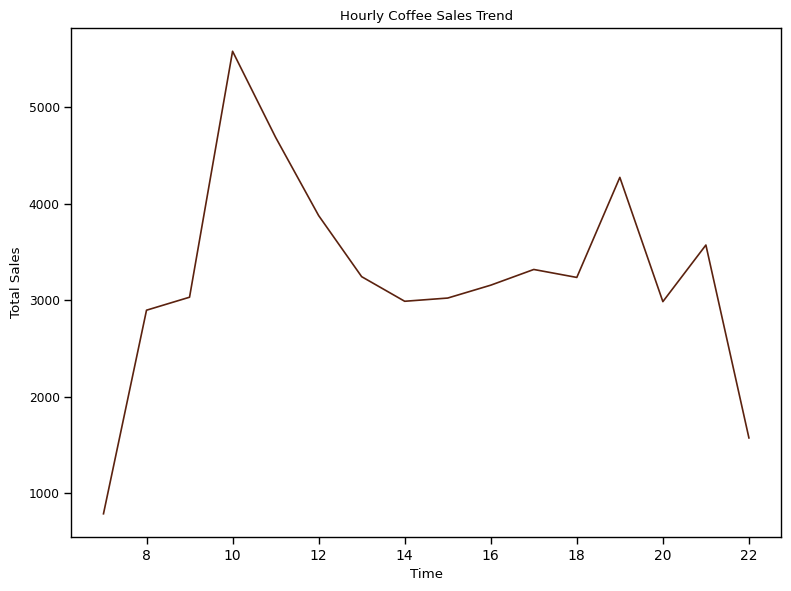

In [286]:
coff_sales['datetime'] = pd.to_datetime(coff_sales['datetime'])
coff_sales['hour'] = coff_sales['datetime'].dt.hour
peak_hours = coff_sales.groupby('hour')['money'].sum().reset_index()
brown_palette = '#5b220f' 
plt.figure(figsize=(8, 6))  
sns.lineplot(x='hour', y='money', data = peak_hours, color=brown_palette)
plt.xticks(fontsize=10) 
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.title('Hourly Coffee Sales Trend')
plt.tight_layout()
plt.show()
